In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #para poner histogramas juntos

# Estadística descriptiva: valores atípicos

Cargamos los datos de nuevos y construimos los dataframes

In [12]:
def chr_int(a):
    """ Si es un número, lo devuelve. Si no devuelve -1 """
    if a.strip().isdigit():
        return int(a)
    else:
        return 0


file = open('adult.data', 'r')  # apertura del fichero

datos = []  # Base de datos
n = 0  # recuento de datos
for i in file:  # por cada fila del fichero de datos
    fila = i.split(",")  # divide en trozo las filas
    for j in range(0, len(fila)):
        fila[j] = fila[j].strip()  # necesario limpiar caracteres espacios en blanco o saltos de línea.
    try:
        datos.append([chr_int(fila[0]),
                      fila[1],
                      chr_int(fila[2]),
                      fila[3],
                      chr_int(fila[4]),
                      fila[5], fila[6], fila[7], fila[8], fila[9],
                      chr_int(fila[10]), chr_int(fila[11]), chr_int(fila[12]),
                      fila[13], fila[14]])
    except IndexError as e:
        print("Fin de fichero")


Fin de fichero


## Construcción de los dataframes

In [13]:
# Se construye un dataframe en pandas
df = pd.DataFrame(datos)
# datos es una lista de listas, cada una con un registro. En el programa se han quitado espacios a cada
# dato leído del fichero, se han convertido en enteros los que eran números.
df.columns = ['edad', 'tipo de empleado', 'fnlwgt', 'educación', 'educación_n', 'estado civil', 'ocupación', 'relación',
              'carrera', 'sexo', 'ganancias', 'pérdidas', 'horas semana', 'país', 'ingresos']


### Sub dataframes

In [14]:
# separamos los data frames por sexo, y por sexo y por nivel de ingresos
mdf = df[df['sexo'] == 'Male']
wdf = df[df['sexo'] == 'Female']
mdf1 = df[(df['sexo'] == 'Male') & (df['ingresos'] == '>50K')]
wdf1 = df[(df.sexo == 'Female') & (df.ingresos == '>50K')]

<hr>

# Valores atípicos

Los valores atípicos pueden detectarse, o bien porque están muy alejados de la mediana, o porque están a 2 ó 3 desviaciones típicas de la media.  Por ejemplo, escogemos los subdataframes con los valores retirados a 15 por debajo de la media y a 35 por encima respecto de los obtenidos con altos ingresos, hombres y mujeres. Dos formas de hacerlo, con drop o escogiendo los que están dentro del rango


### Filtramos datos

Nos quedamos con los valores de los datos en que sean de altos ingresos y quitamos datos atípicos (mediana menos quince, mediana más treinta y cinco) de la tabla original df. 

In [15]:
# Los valores que quito son los de edad menor que la mediana menos quince y los mayores de la mediana más quince.
mdf1_sin = mdf1.drop(mdf1.index[ (mdf1['edad']<df['edad'].median()-15) | (mdf1['edad']>df['edad'].median()+35) ])
wdf1_sin = wdf1.drop(wdf1.index[ (wdf1['edad']<df['edad'].median()-15) | (wdf1['edad']>df['edad'].median()+35) ])
# mdf1_sin = mdf1[ (mdf1['edad']>=df['edad'].median()-15) & (mdf1['edad']<=df['edad'].median()+35) ]
# wdf1_sin = wdf1[ (wdf1['edad']>=df['edad'].median()-15) & (wdf1['edad']<=df['edad'].median()+35) ]
# df sin valores atípicos (total)
df_sin=df.drop (df.index[ (df['edad']<df['edad'].median()-15) | (df['edad']>df['edad'].median()+35) ])

In [16]:
### Valores medios ahora
mediaMujeres = wdf1_sin['edad'].mean()
medianaMujeres = wdf1_sin['edad'].median()
stdMujeres = wdf1_sin['edad'].std() 
mediaHombres = mdf1_sin['edad'].mean()
medianaHombres = mdf1_sin['edad'].median()
stdHombres = mdf1_sin['edad'].std() 

print ("Media con valores atípicos en las mujeres {} ± {} y mediana {} ".format(wdf1['edad'].mean(), wdf1['edad'].std(),wdf1['edad'].median() ))
print ("Media con valores atípicos en los hombres {} ± {} y mediana {} ".format(mdf1['edad'].mean(), mdf1['edad'].std(),mdf1['edad'].median() ))
print ("Media sin valores atípicos en las mujeres {} ± {} y mediana {} ".format(mediaMujeres, stdMujeres, medianaMujeres))
print ("Media sin valores atípicos en los hombres {} ± {} y mediana {} ".format(mediaHombres, stdHombres, medianaHombres))

print("Diferencia entre hombres y mujeres incluidos valores atípicos: {}".format(mdf1['edad'].mean()-wdf1['edad'].mean()))
print("Diferencia entre hombres y mujeres sin incluir valores atípicos: {}".format(mdf1_sin['edad'].mean()-wdf1_sin['edad'].mean()))



Media con valores atípicos en las mujeres 42.125530110262936 ± 10.460103747601886 y mediana 41.0 
Media con valores atípicos en los hombres 44.62578805163614 ± 10.485469314658651 y mediana 44.0 
Media sin valores atípicos en las mujeres 41.93236301369863 ± 9.989525648849213 y mediana 41.0 
Media sin valores atípicos en los hombres 44.325352326110014 ± 10.012302742491952 y mediana 44.0 
Diferencia entre hombres y mujeres incluidos valores atípicos: 2.5002579413732064
Diferencia entre hombres y mujeres sin incluir valores atípicos: 2.3929893124113875


#### Podemos comparar los datos

##### Comparamos media, mediana y desviación típica de los subdataframes con valores retirados y sin retirar.
- Media con valores atípicos en las mujeres 42.125530110262936 ± 10.460103747601886 y mediana 41.0
- Media con valores atípicos en los hombres 44.62578805163614 ± 10.485469314658651 y mediana 44.0
- Media sin valores atípicos en las mujeres 41.93236301369863 ± 9.989525648849213 y mediana 41.0
- Media sin valores atípicos en los hombres 44.325352326110014 ± 10.012302742491952 y mediana 44.0

##### Diferencias entre medias de hombres y mujeres, con y sin valores atípicos
- Diferencia entre hombres y mujeres incluidos valores atípicos: 2.5002579413732064
- Diferencia entre hombres y mujeres sin incluir valores atípicos: 2.3929893124113875



### Dibujamos una gráfica
Dibujamos ahora una gráfica con los valores (hombres y mujeres) con mayores ingresos, con y sin valores atípicos. Dataframes df y df_sin  



<Axes: >

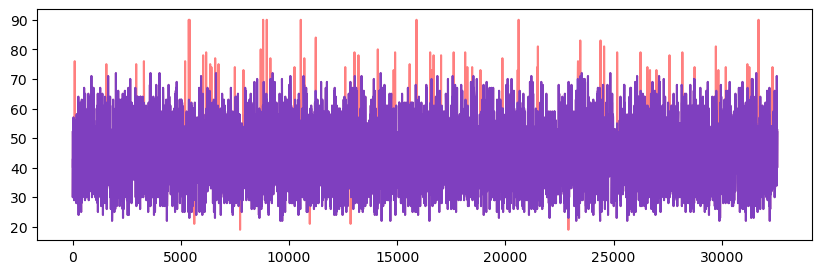

In [17]:
plt.figure(figsize=(10,3))
df.edad[ (df.ingresos == '>50K') ].plot(alpha=0.5,color="r")
df_sin.edad[ (df_sin.ingresos == '>50K') ].plot(alpha=0.5,color="b")

<hr>

#### Gráfica de diferencias

En esta gráfica calculamos los histogramas para ambos dataframes. El valor **count** son los valores. **division** son los intervalos. Hay que calcular los valores medios de los intervalos a partir de las divisiones (**val**). Los valores val serán las "x" y la diferencia de valores las "y".

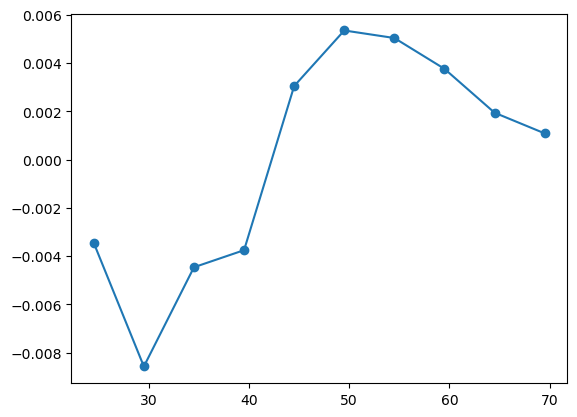

In [18]:
countx,divisionx = np.histogram(mdf1_sin['edad'], density=True)
county,divisiony = np.histogram(wdf1_sin['edad'], density=True)
val = [ (divisionx[i] + divisionx[i+1])/2 for i in range(len(divisionx)-1) ]
plt.plot( val, countx-county,'o-')
# print(divisionx) --> [22. 27. 32. 37. 42. 47. 52. 57. 62. 67. 72.] 11 valores , los intervalos, los extremos.  
# print(countx) --> [0.00390968 0.01642673 0.02773147 0.03545992 0.03661161
#                    0.03206546 0.02182149 0.01557812 0.00691014 0.00348538] 10 valores en el histograma
# Luego val son 10 valores intermedios (semisuma) entre los rangos de los intervalos
# countx-county es la diferencia de los valores hombres - mujeres



<hr>

## Oblicuidad o asimetría (skewness)

Este parámetro estadístico indica la inclinación de los datos a uno u otro lado de la media. Si la distribución es normal su asimetría es cero. Y si es negativa se “inclina” a la izquierda o positiva, a la derecha. 

- Se pueden usar dos fórmulas $g_{1}=\frac{1}{n} \; \sum_{i}^{n}\frac{(x_i-\mu)^3}{\sigma^3}$ o bien $g_{p}=3 \cdot (\mu - \mu_{12}) / \sigma$. La segunda es **la asimetría de Pearson respecto de la mediana**. Donde μ es la media , $\mu_{12}$ es la mediana y σ es la desviación típica y n el número de elementos.
- Esta asimetría puede verse potenciada por la presencia de atípicos.
- **NOTA**: ambas fórmulas parecen estar mal en los apuntes. Las he buscado por internet y en esta hoja aparecen las correctas según lo que he investigado. De todas formas parece que hay más, como el primer coeficiente de Pearson y la curtosis que mide la forma de la campana. 


In [19]:
def asimetria(misDatos):
    n = len(misDatos)    
    mu = misDatos.mean()
    sigma = misDatos.std()
    # print(n,mu,sigma)
    g1 = 0
    for i in misDatos:
        g1 = g1 + ((i- mu)/sigma) ** 3
    g1 = g1 / n
    return g1

def pearson(misDatos):
    mu = misDatos.mean()
    sigma = misDatos.std()
    mediana = misDatos.median()
    return 3*(mu-mediana) / sigma

print("Asimetría del conjunto de hombres {:.4f} y asimetría de Pearson {:.4f} (sin atípicos)".format(asimetria(mdf1_sin['edad']),pearson(mdf1_sin['edad'])))
print("Asimetría del conjunto de mujeres {:.4f} y asimetría de Pearson {:.4f} (sin atípicos)".format(asimetria(wdf1_sin['edad']),pearson(wdf1_sin['edad'])))     
print("Asimetría del conjunto de hombres {:.4f} y asimetría de Pearson {:.4f} (con atípicos)".format(asimetria(mdf1['edad']),pearson(mdf1['edad'])))
print("Asimetría del conjunto de mujeres {:.4f} y asimetría de Pearson {:.4f} (con atípicos)".format(asimetria(wdf1['edad']),pearson(wdf1['edad'])))     

Asimetría del conjunto de hombres 0.2693 y asimetría de Pearson 0.0975 (sin atípicos)
Asimetría del conjunto de mujeres 0.4021 y asimetría de Pearson 0.2800 (sin atípicos)
Asimetría del conjunto de hombres 0.4640 y asimetría de Pearson 0.1790 (con atípicos)
Asimetría del conjunto de mujeres 0.5916 y asimetría de Pearson 0.3228 (con atípicos)
